# Titanic Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [9]:
# train.columns

# train.info() = to know if nulls

# train.describe() = some stats about the DF

# train.shape =  gives (n of rows, n cols)

train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# how categ vars behave
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [107]:
train.groupby(['Survived', 'Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

In [108]:
survivors_by_sex = train.groupby(['Survived', 'Sex']).count()['PassengerId']
survivors_by_sex

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

In [70]:
suvs_by_gender = survivors_by_sex.unstack(level=0)
# print(suvrs_by_gender)

<AxesSubplot:xlabel='Sex'>

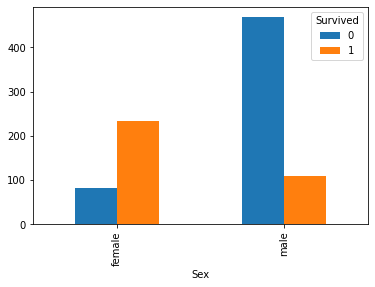

In [79]:
# Bar Plots
suvs_by_gender.plot.bar()

In [132]:
trainCleaner =train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [113]:
trainCleaner

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3
3,1,female,35.0,1
4,0,male,35.0,3
...,...,...,...,...
886,0,male,27.0,2
887,1,female,19.0,1
888,0,female,NaN,3
889,1,male,26.0,1


In [120]:
# see nulls
(trainCleaner[trainCleaner['Age'].isna()].groupby(['Sex', 'Pclass']).count()['Survived'].unstack(level=0))

# survivors_by_sex = train.groupby(['Survived', 'Sex']).count()['PassengerId']
# survivors_by_sex

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [121]:
# see if there is a relation between unreported age and families inside the DF
(train[train['Age'].isna()].groupby(['SibSp', 'Parch']).count()['Survived'].unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


In [131]:
# see if there is a relation between unreported age and families, Class inside the DF
(train[train['Age'].isna()].groupby(['Pclass', 'Survived','SibSp', 'Parch']).count()['PassengerId'].unstack(level=0))

Pclass                   1    2     3
Survived SibSp Parch                 
0        0     0      16.0  7.0  77.0
               2       NaN  NaN   2.0
         1     0       NaN  NaN   9.0
               2       NaN  NaN   2.0
         2     0       NaN  NaN   1.0
         3     1       NaN  NaN   4.0
         8     2       NaN  NaN   7.0
1        0     0       7.0  4.0  22.0
               1       1.0  NaN   NaN
               2       NaN  NaN   1.0
         1     0       6.0  NaN   6.0
               1       NaN  NaN   3.0
         2     0       NaN  NaN   2.0

In [124]:
train['Age'].median()

28.0

In [133]:
# fill null ages with meadian of ages
train['Age'] = train['Age'].fillna(28.0)
trainCleaner =train[['Survived', 'Sex', 'Age', 'Pclass']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [ ]:
# map for label encoding -- changing sex female=1 male=0 
train.Sex = train.Sex.map({'female':1, 'male':0}).astype(int)

In [140]:
train['FlagSolo'] = np.where((train.SibSp == 0) & (train.Parch == 0), 1,0)

<AxesSubplot:xlabel='FlagSolo'>

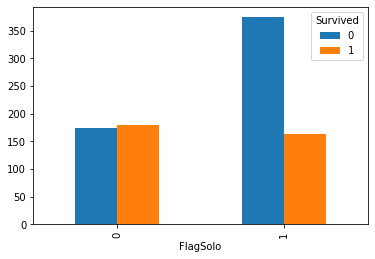

In [154]:
solos = train.groupby(['Survived', 'FlagSolo']).count()['PassengerId'].unstack(level=0)
solos.plot.bar()

<AxesSubplot:xlabel='Pclass'>

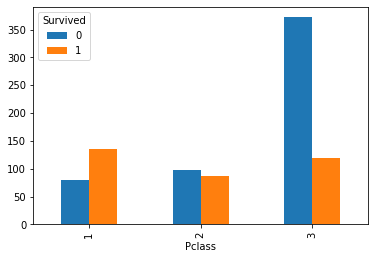

In [157]:
solos = train.groupby(['Survived', 'Pclass']).count()['PassengerId'].unstack(level=0)
solos.plot.bar()

Doing some analysis of prev grahps, can be seen that 3rd class was the most affected and also the alone men in 3rd class died and some women (50 aprox) survived. 

In [158]:
# dep vars
Y_train = train['Survived']

# preproc of indep vars
features = ['Sex', 'Age', 'Pclass', 'FlagSolo']
X_train = train[features]

print(Y_train.shape, X_train.shape)

(891,) (891, 4)


## Creating ML Models